In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
#aqdata is the name of the DataFrame, short for Air Quality Data.
aqdata=pd.read_csv('C:/Users/MyPC/MyPython/Project/Files/Data-files-master/NSIT Dwarka.csv')
aqdata.head()

,From Date,To Date,PM2.5,SO2,Ozone,NO2
0,01-01-2014 00:00,02-01-2014 00:00,None,22.7,8.63,5.59
1,02-01-2014 00:00,03-01-2014 00:00,None,8.72,8.43,3.68
2,03-01-2014 00:00,04-01-2014 00:00,None,13.83,9.77,3.83
3,04-01-2014 00:00,05-01-2014 00:00,None,27.64,6.83,9.64
4,05-01-2014 00:00,06-01-2014 00:00,None,37.17,7.34,11.06


In [3]:
aqdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   From Date  2191 non-null   object
 1   To Date    2191 non-null   object
 2   PM2.5      2191 non-null   object
 3   SO2        2187 non-null   object
 4   Ozone      2187 non-null   object
 5   NO2        2190 non-null   object
dtypes: object(6)
memory usage: 102.9+ KB


In [4]:
aqdata.shape

(2192, 6)

In [5]:
aqdata.isna().sum()

From Date    1
To Date      1
PM2.5        1
SO2          5
Ozone        5
NO2          2
dtype: int64

In [9]:
aqdata = aqdata.replace({'None':np.nan})

In [10]:
aqdata.isna().sum()

From Date      1
To Date        1
PM2.5        562
SO2           84
Ozone        106
NO2          105
dtype: int64

In [11]:
aqdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   From Date  2191 non-null   object
 1   To Date    2191 non-null   object
 2   PM2.5      1630 non-null   object
 3   SO2        2108 non-null   object
 4   Ozone      2086 non-null   object
 5   NO2        2087 non-null   object
dtypes: object(6)
memory usage: 102.9+ KB


In [12]:
aqdata['From Date']=pd.to_datetime(aqdata['From Date'], format='%d-%m-%Y %H:%M')
aqdata['To Date']=pd.to_datetime(aqdata['To Date'], format='%d-%m-%Y %H:%M')
aqdata['SO2']=pd.to_numeric(aqdata['SO2'],errors='coerce')
aqdata['NO2']=pd.to_numeric(aqdata['NO2'],errors='coerce')
aqdata['Ozone']=pd.to_numeric(aqdata['Ozone'],errors='coerce')
aqdata['PM2.5']=pd.to_numeric(aqdata['PM2.5'],errors='coerce')

In [13]:
aqdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   From Date  2191 non-null   datetime64[ns]
 1   To Date    2191 non-null   datetime64[ns]
 2   PM2.5      1630 non-null   float64       
 3   SO2        2108 non-null   float64       
 4   Ozone      2086 non-null   float64       
 5   NO2        2087 non-null   float64       
dtypes: datetime64[ns](2), float64(4)
memory usage: 102.9 KB


In [17]:
aqdata['Year'] = pd.DatetimeIndex(aqdata['From Date']).year

In [18]:
aq2014=aqdata[aqdata['Year']==2014]
aq2015=aqdata[aqdata['Year']==2015]
aq2016=aqdata[aqdata['Year']==2016]
aq2017=aqdata[aqdata['Year']==2017]
aq2018=aqdata[aqdata['Year']==2018]
aq2019=aqdata[aqdata['Year']==2019]

In [23]:
#dropping the null values for the four years chosen for analysis, disregard 2014 and 2015 due to large amount of Null values
aq2016.dropna(inplace=True)
aq2017.dropna(inplace=True)
aq2018.dropna(inplace=True)
aq2019.dropna(inplace=True)

<ipython-input-23-de01f348f113>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aq2016.dropna(inplace=True)
<ipython-input-23-de01f348f113>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aq2017.dropna(inplace=True)
<ipython-input-23-de01f348f113>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aq2018.dropna(inplace=True)
<ipython-input-23-de01f348f113>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

**Compare between yearly average levels and prescribed annual standards of the four pollutants**

In [24]:
#Yearly averages for SO2 in each year
s16avg=round(aq2016['SO2'].mean(),2)
s17avg=round(aq2017['SO2'].mean(),2)
s18avg=round(aq2018['SO2'].mean(),2)
s19avg=round(aq2019['SO2'].mean(),2)
#Yearly averages for PM2.5 in each year
p16avg=round(aq2016['PM2.5'].mean(),2)
p17avg=round(aq2017['PM2.5'].mean(),2)
p18avg=round(aq2018['PM2.5'].mean(),2)
p19avg=round(aq2019['PM2.5'].mean(),2)
#Yearly averages for NO2 in each year
n16avg=round(aq2016['NO2'].mean(),2)
n17avg=round(aq2017['NO2'].mean(),2)
n18avg=round(aq2018['NO2'].mean(),2)
n19avg=round(aq2019['NO2'].mean(),2)

In [26]:
#Creating data frames with yearly averages for each pollutant
dfs=pd.DataFrame({'Yearly average':[s16avg,s17avg,s18avg,s19avg]},
                 index=['2016','2017','2018','2019']) #dfs is for SO2
dfp=pd.DataFrame({'Yearly average':[p16avg,p17avg,p18avg,p19avg]},
                 index=['2016','2017','2018','2019']) #dfp is for PM2.5
dfn=pd.DataFrame({'Yearly average':[n16avg,n17avg,n18avg,n19avg]},
                 index=['2016','2017','2018','2019']) #dfn is for NO2

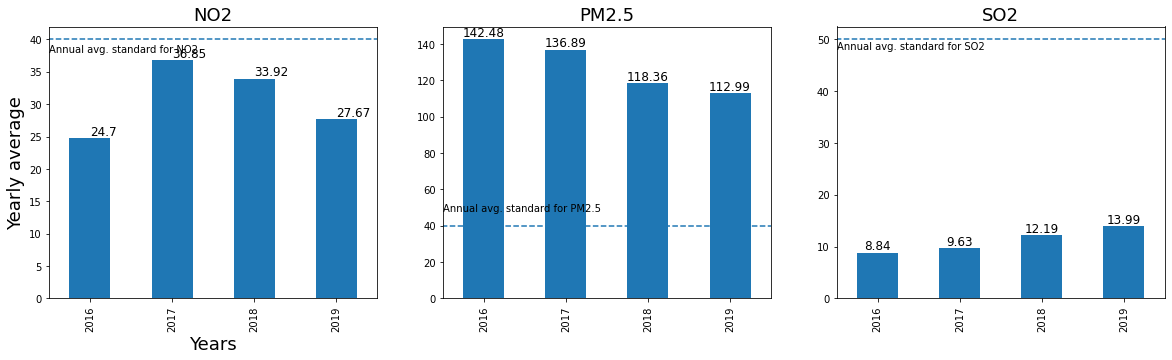

In [29]:
#Creating a figure with 3 subplots - 1 for each pollutant
fig,(ax1,ax2,ax3)=plt.subplots(1,3)
mpl.rcParams['figure.dpi'] = 400
#Creating a DataFrame the yearly averages for NO2
dfn.plot(kind='bar',figsize=(20,5),ax=ax1)
ax1.set_title("NO2", fontsize=18)
ax1.set_xlabel("Years", fontsize=18)
ax1.legend().set_visible(False)
ax1.set_ylabel("Yearly average", fontsize=18)
ax1.hlines(40, -.9,15, linestyles="dashed")
ax1.annotate('Annual avg. standard for NO2',(-0.5,38))
for p in ax1.patches:
    ax1.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()), 
    color="black", ha="left", va ='bottom',fontsize=12)
    
#Plotting the yearly averages similarly for PM2.5
dfp.plot(kind='bar',figsize=(20,5),ax=ax2)
ax2.set_title("PM2.5", fontsize=18)
ax2.hlines(40, -.9,15, linestyles="dashed")
ax2.annotate('Annual avg. standard for PM2.5',(-0.5,48))
ax2.legend().set_visible(False)
for p in ax2.patches:
    ax2.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()),
    color="black", ha="center", va ='bottom',fontsize=12)

    #Plotting the yearly averages similarly for SO2
dfs.plot(kind='bar',figsize=(20,5),ax=ax3)
ax3.hlines(50, -.9,15, linestyles="dashed")
ax3.annotate('Annual avg. standard for SO2',(-0.5,48))
ax3.set_title("SO2", fontsize=18)
ax3.legend().set_visible(False)
for p in ax3.patches:
    ax3.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()), 
    color="black", ha="center", va ='bottom',fontsize=12)

**Plotting the number of days in each year where 24-hourly standards are exceeded for PM2.5 and NO2**

For PM2.5

In [31]:
#Creating intervals for 2016 with the number of days with PM2.5 
#concentration falling in that interval
a2=aq2016[(aq2016['PM2.5']<=60)]['PM2.5'].count()
b2=aq2016[((aq2016['PM2.5']>60) & (aq2016['PM2.5']<=120))]['PM2.5'].count()
c2=aq2016[((aq2016['PM2.5']>120) & (aq2016['PM2.5']<=180))]['PM2.5'].count()
d2=aq2016[(aq2016['PM2.5']>180)]['PM2.5'].count()
dfpb2016=pd.DataFrame({'year':'2016',
                       'pm levels':['<60','between 61 and 120','between 121 and 180','greater than 180'],
                       'number of critical days':[a2,b2,c2,d2]})

#Creating intervals for 2017 with the number of days with PM2.5 
#concentration falling in each interval
a3=aq2017[(aq2017['PM2.5']<=60)]['PM2.5'].count()
b3=aq2017[((aq2017['PM2.5']>60) & (aq2017['PM2.5']<=120))]['PM2.5'].count()
c3=aq2017[((aq2017['PM2.5']>120) & (aq2017['PM2.5']<=180))]['PM2.5'].count()
d3=aq2017[(aq2017['PM2.5']>180)]['PM2.5'].count()
dfpb2017=pd.DataFrame({'year':'2017',
                       'pm levels':['<60','between 61 and 120','between 121 and 180','greater than 180'],
                       'number of critical days':[a3,b3,c3,d3]})

#Creating intervals for 2018 with the number of days with PM2.5 
#concentration falling in each interval
a4=aq2018[(aq2018['PM2.5']<=60)]['PM2.5'].count()
b4=aq2018[((aq2018['PM2.5']>60) & (aq2018['PM2.5']<=120))]['PM2.5'].count()
c4=aq2018[((aq2018['PM2.5']>120) & (aq2018['PM2.5']<=180))]['PM2.5'].count()
d4=aq2018[(aq2018['PM2.5']>180)]['PM2.5'].count()
dfpb2018=pd.DataFrame({'year':'2018','pm levels':['<60','between 61 and 120','between 121 and 180','greater than 180'],
                       'number of critical days':[a4,b4,c4,d4]})

#Creating intervals for 2019 with the number of days with PM2.5 
#concentration falling in each interval
a5=aq2019[(aq2019['PM2.5']<=60)]['PM2.5'].count()
b5=aq2019[((aq2019['PM2.5']>60) & (aq2019['PM2.5']<=120))]['PM2.5'].count()
c5=aq2019[((aq2019['PM2.5']>120) & (aq2019['PM2.5']<=180))]['PM2.5'].count()
d5=aq2019[(aq2019['PM2.5']>180)]['PM2.5'].count()
dfpb2019=pd.DataFrame({'year':'2019','pm levels':['<60','between 61 and 120','between 121 and 180','greater than 180'],
                       'number of critical days':[a5,b5,c5,d5]})

In [32]:
dfpivot2019=dfpb2019.pivot(index='year',columns='pm levels',values='number of critical days')
dfpivot2018=dfpb2018.pivot(index='year',columns='pm levels',values='number of critical days')
dfpivot2017=dfpb2017.pivot(index='year',columns='pm levels',values='number of critical days')
dfpivot2016=dfpb2016.pivot(index='year',columns='pm levels',values='number of critical days')

Text(0.5, 1.0, '2016')

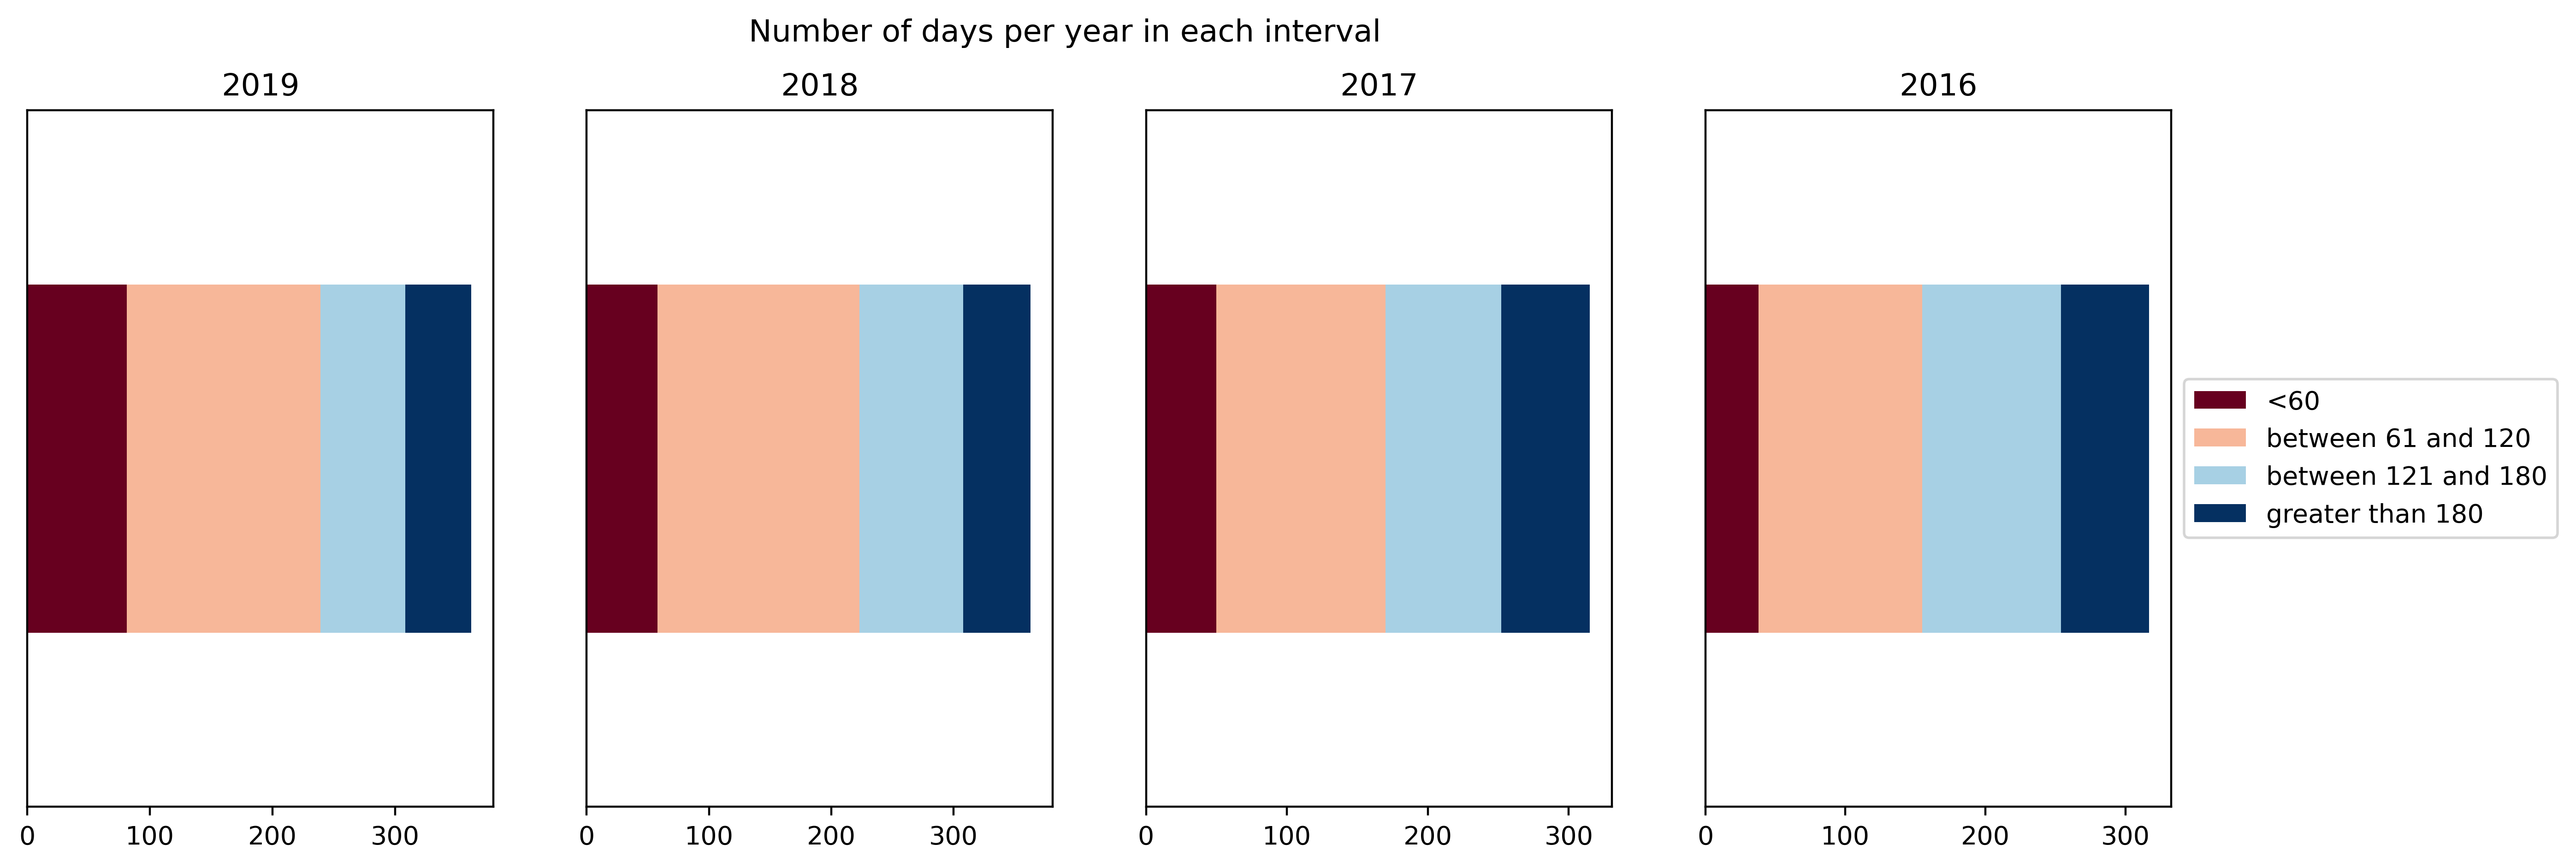

In [37]:
#Creating a figure with 4 sub-plots, one for each year from 2016-19
fig,(ax1,ax2,ax3,ax4)=plt.subplots(1,4)
fig.suptitle("Number of days per year in each interval")
cmp=plt.cm.get_cmap('RdBu')

#Plotting stacked horizontal bar charts for each year to represent intervals of PM2.5 levels
dfpivot2019.loc[:,['<60','between 61 and 120','between 121 and 180',
                   'greater than 180']].plot.barh(stacked=True, cmap=cmp,figsize=(15,5),ax=ax1)

dfpivot2018.loc[:,['<60','between 61 and 120','between 121 and 180',
                   'greater than 180']].plot.barh(stacked=True, cmap=cmp, figsize=(15,5),ax=ax2)

dfpivot2017.loc[:,['<60','between 61 and 120','between 121 and 180',
                   'greater than 180']].plot.barh(stacked=True, cmap=cmp, figsize=(15,5),ax=ax3)

dfpivot2016.loc[:,['<60','between 61 and 120','between 121 and 180',
                   'greater than 180']].plot.barh(stacked=True, cmap=cmp, figsize=(15,5),ax=ax4)

#Setting the properties - legend, yaxis and title
ax1.legend().set_visible(False)
ax2.legend().set_visible(False)
ax3.legend().set_visible(False)
ax4.legend(loc='center left',bbox_to_anchor=(1,0.5))
ax1.get_yaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)
ax3.get_yaxis().set_visible(False)
ax4.get_yaxis().set_visible(False)
ax1.set_title('2019')
ax2.set_title('2018')
ax3.set_title('2017')
ax4.set_title('2016')

For NO2

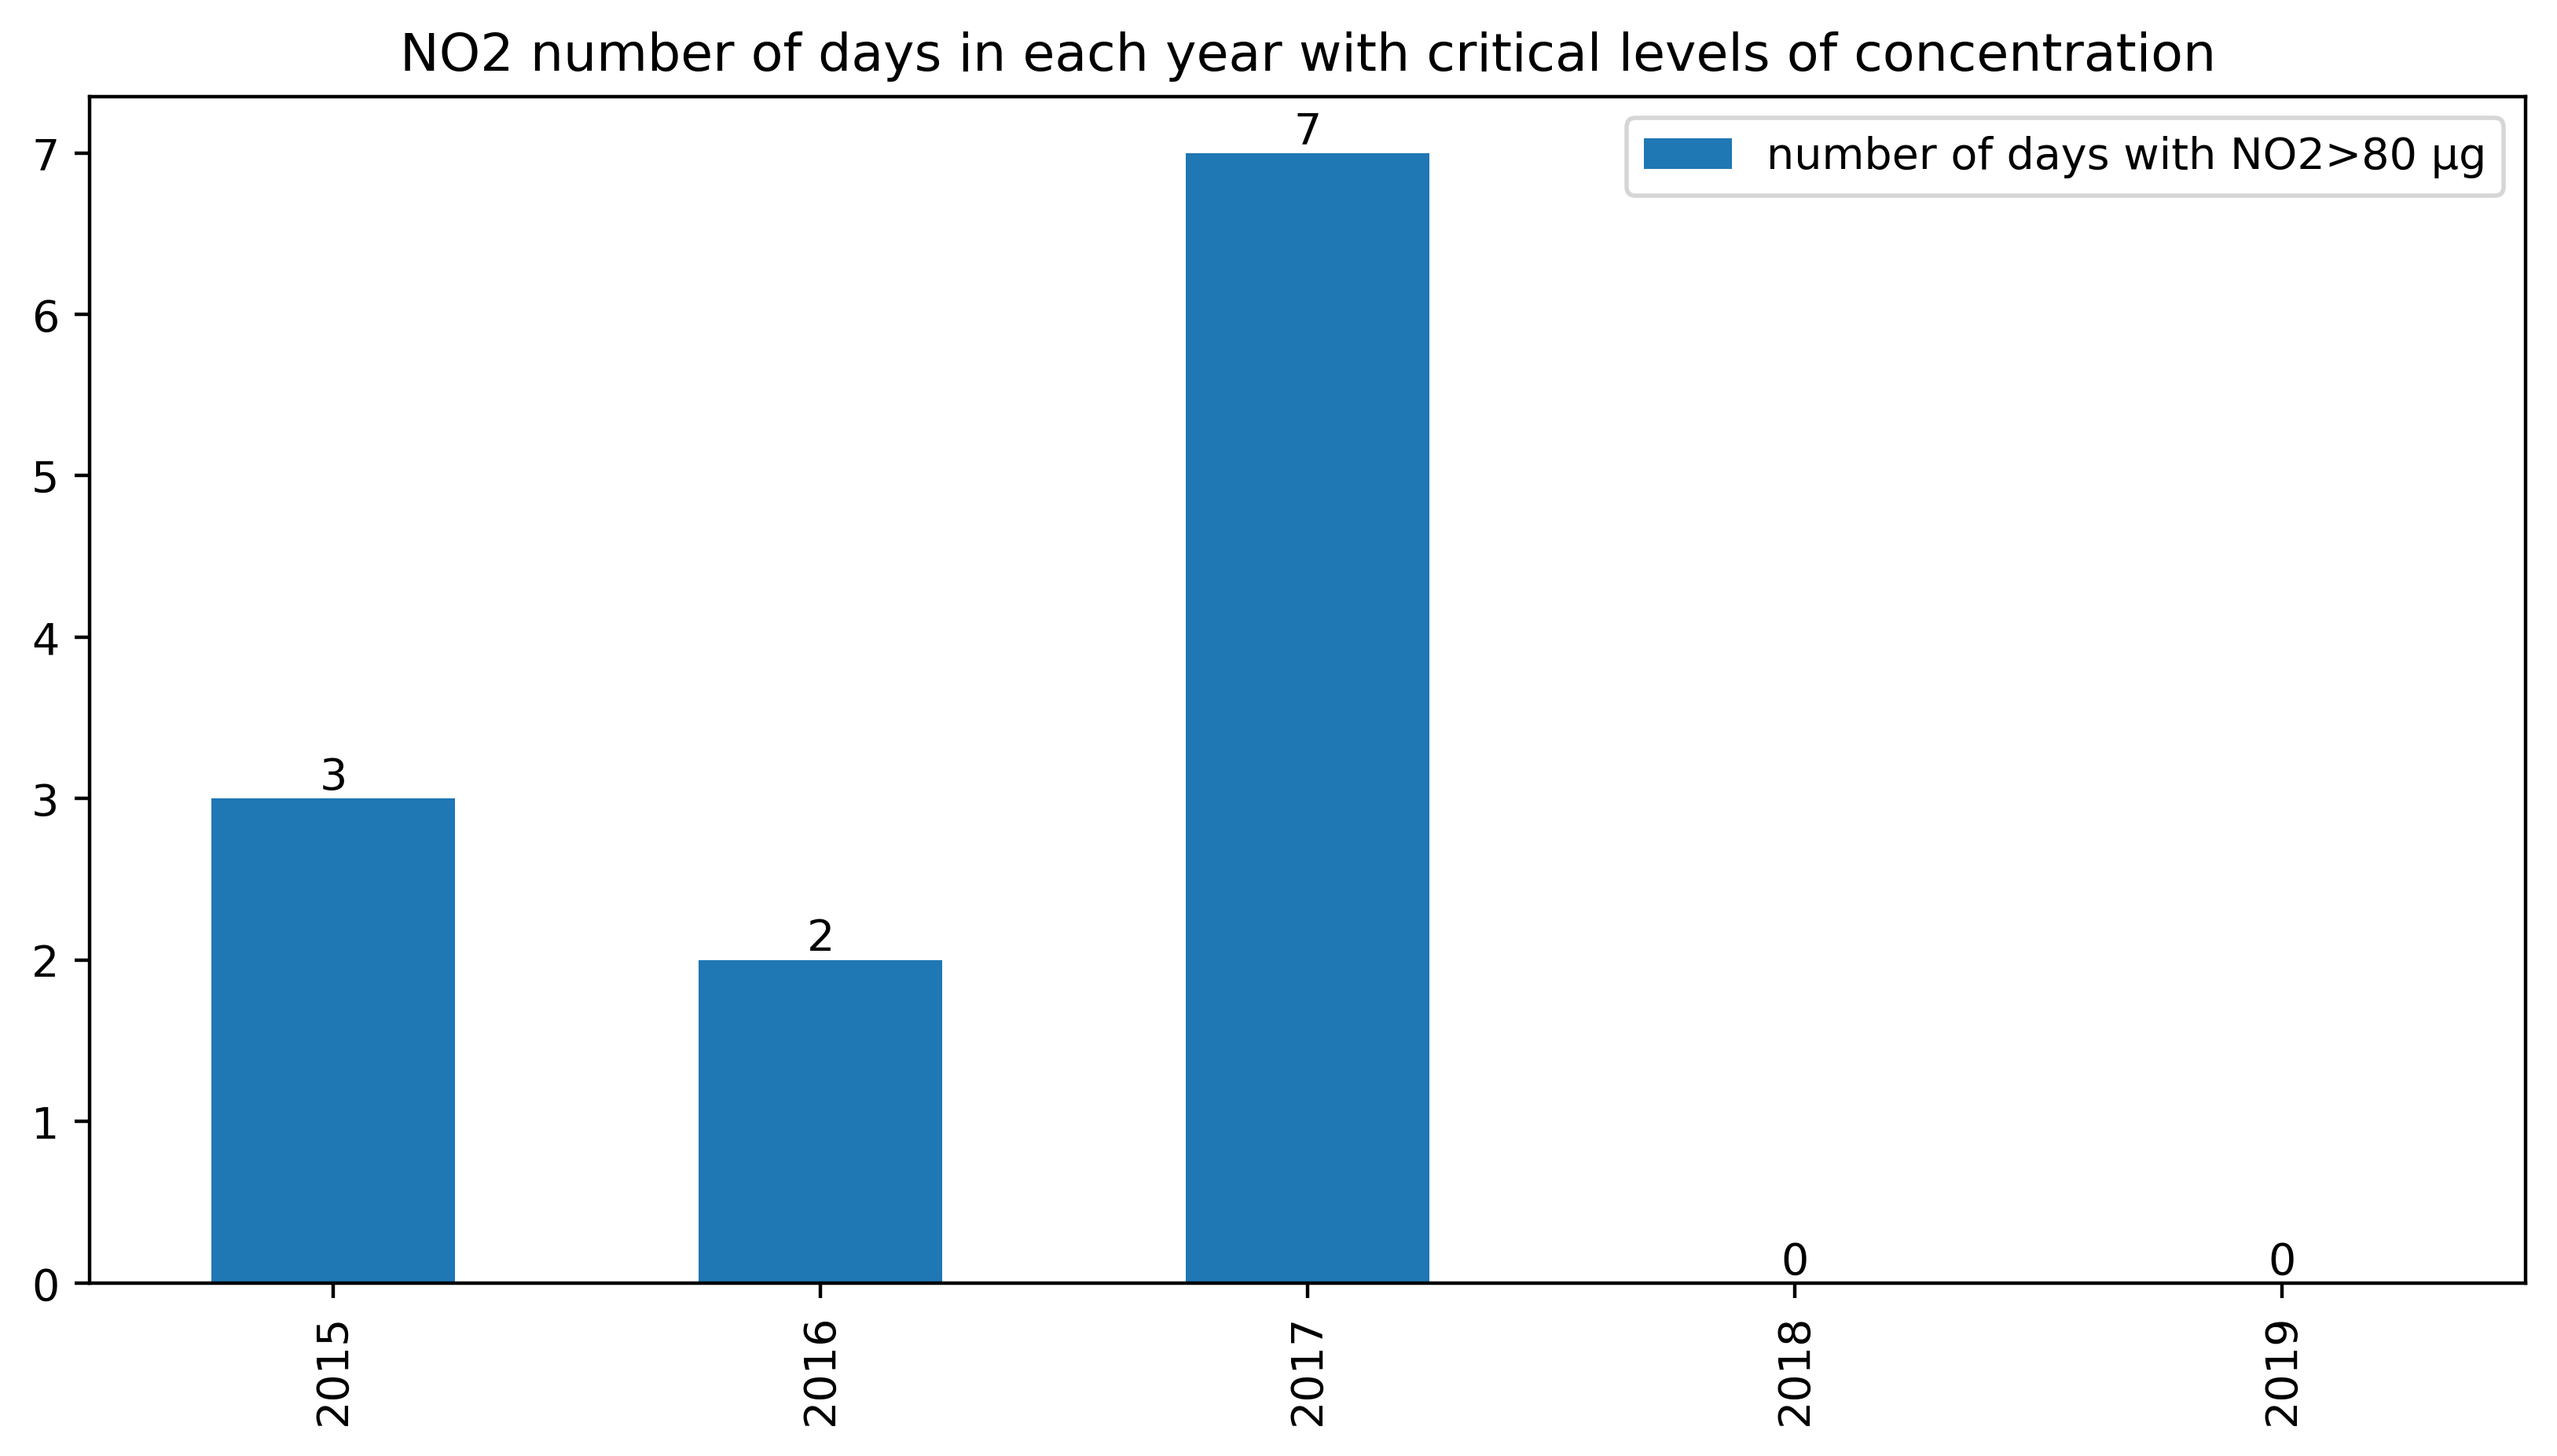

In [38]:
#Calculating the number of days in each year with regard to critical days 
#of NO2 concentration
a=aq2015[(aq2015['NO2']>=80)]['NO2'].count()
b=aq2016[(aq2016['NO2']>=80)]['NO2'].count()
c=aq2017[(aq2017['NO2']>=80)]['NO2'].count()
d=aq2018[(aq2018['NO2']>=80)]['NO2'].count()
e=aq2019[(aq2019['NO2']>=80)]['NO2'].count()
dfno=pd.DataFrame({'years':['2015','2016','2017','2018','2019'],
                   'number of days with NO2>80 μg':[a,b,c,d,e]})
ax=dfno.plot(kind='bar',figsize=(10,5))
ax.set_xticklabels(['2015','2016','2017','2018','2019'])
ax.set_title("NO2 number of days in each year with critical levels of concentration")
for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2,p.get_height()), ha = 'center', va = 'bottom')

**Identifying the months where PM2.5 daily values exceed critical levels on the majority of the day**

In [39]:
#Creating a dataframe for 2016 with the number of days in each month where 
#the PM2.5 concentration is >180
aq2016['Month']=pd.DatetimeIndex(aq2016['From Date']).month 
aq2016['condition']=(aq2016['PM2.5']>=180 )
aq2016['condition']=aq2016['condition'].replace({False:np.nan})
selection1=aq2016.groupby('Month')['condition'].count()

#Repeating the above process for 2017
aq2017['Month']=pd.DatetimeIndex(aq2017['From Date']).month
aq2017['condition']=(aq2017['PM2.5']>=180 )
aq2017['condition']=aq2017['condition'].replace({False:np.nan})
selection2=aq2017.groupby('Month')['condition'].count()

#Repeating the above process for 2018
aq2018['Month']=pd.DatetimeIndex(aq2018['From Date']).month
aq2018['condition']=(aq2018['PM2.5']>=180 )
aq2018['condition']=aq2018['condition'].replace({False:np.nan})
selection3=aq2018.groupby('Month')['condition'].count()

#Repeating the above process for 2019
aq2019['Month']=pd.DatetimeIndex(aq2019['From Date']).month
aq2019['condition']=(aq2019['PM2.5']>=180 )
aq2019['condition']=aq2019['condition'].replace({False:np.nan})
selection4=aq2019.groupby('Month')['condition'].count()

<ipython-input-39-9f51d569b7a5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aq2016['Month']=pd.DatetimeIndex(aq2016['From Date']).month
<ipython-input-39-9f51d569b7a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aq2016['condition']=(aq2016['PM2.5']>=180 )
<ipython-input-39-9f51d569b7a5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

In [40]:
#selectionc data frame is a consolidated dataframe showing month-wise 
#critical values of PM2.5 for every year
selectionc=pd.concat([selection1,selection1,selection3,selection4],axis=1)

#renaming the columns
selectionc.columns=['2016','2017','2018','2019']
selectionc

,2016,2017,2018,2019
Month,,,,
1,20,20,23,14
2,3,3,5,3
3,1,1,0,0
4,3,3,0,1
5,3,3,0,2
6,7,7,4,1
7,2,2,0,0
8,0,0,0,0
9,2,2,0,0


<ipython-input-42-3d106d9b4049>:10: UserWarning: Legend does not support '-' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  ax.legend((patterns),('2016','2017','2018','2019'))
<ipython-input-42-3d106d9b4049>:10: UserWarning: Legend does not support 'x' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  ax.legend((patterns),('2016','2017','2018','2019'))
<ipython-input-42-3d106d9b4049>:10: UserWarning: Legend does not support '/' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  ax.legend((patterns),('2016','2017','2018','2019'))
<ipython-input-42-3d106d9b4049>:10: UserWarning: Legend does not support 'O' instances.
A p

Text(0.5, 1.0, 'Number of days with critical levels of PM2.5 in each month of years 2016-19')

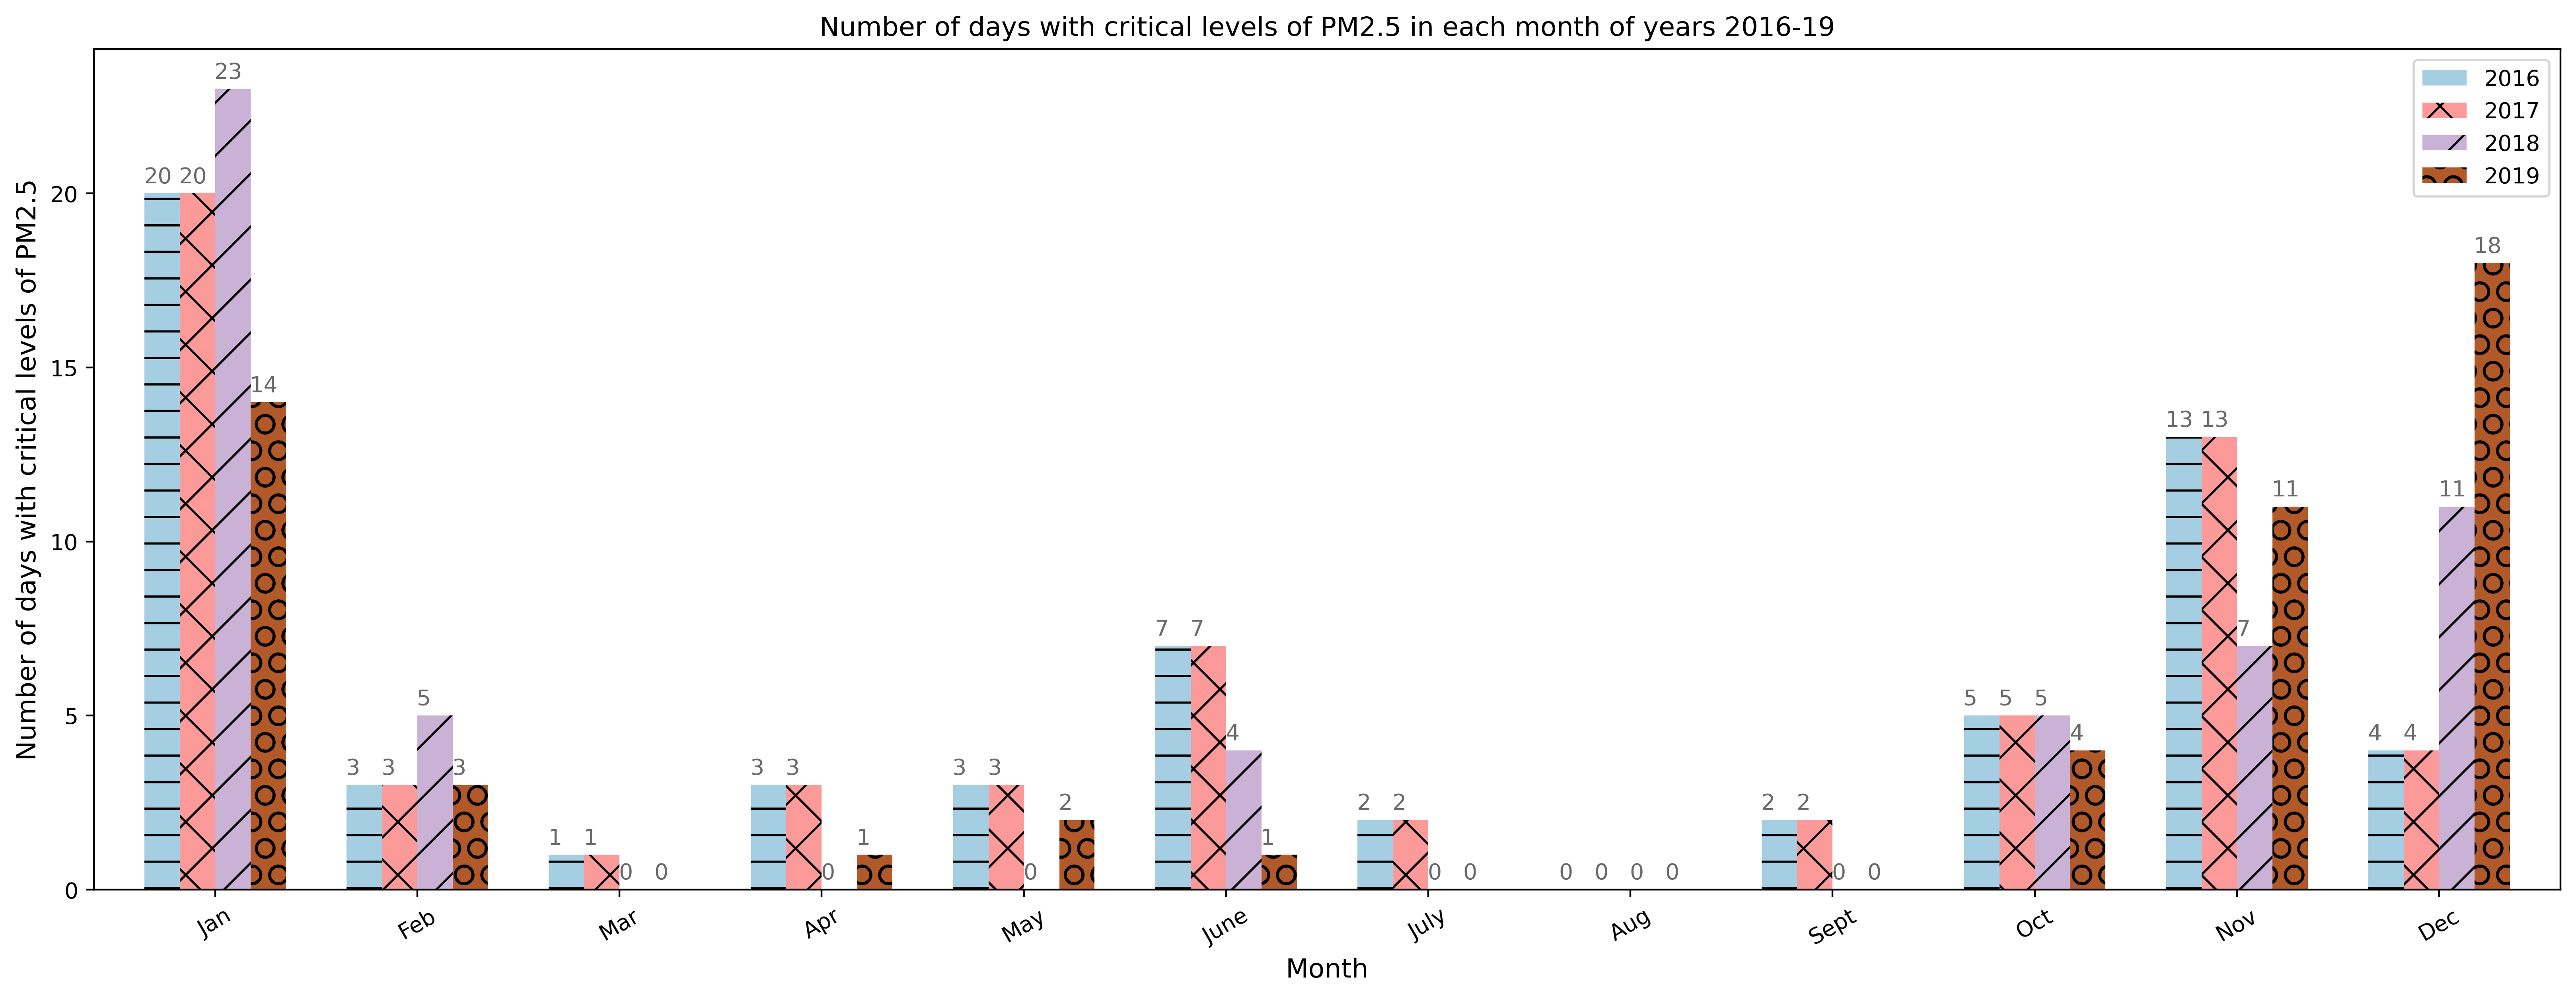

In [42]:
mpl.rcParams['figure.dpi'] = 400
#creating a bar chart representing number of days with critical levels of PM2.5(>180) concentrations
ax=selectionc.plot(kind='bar',figsize=(20,7),
                   width=0.7,align='center',colormap='Paired')
bars = ax.patches
#creating patterns to represent each year
patterns =('-','x','/','O')

#ax.legend(loc='upper left', borderpad=1.5, labelspacing=1.5)
ax.legend((patterns),('2016','2017','2018','2019'))
hatches = [p for p in patterns for i in range(len(selectionc))]

#setting a pattern for each bar 
for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)

#Labelling the months, the X axis and Y axis
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','June','July','Aug',
                    'Sept','Oct','Nov','Dec'],rotation=30)
ax.set_xlabel('Month',fontsize=12)
ax.set_ylabel('Number of days with critical levels of PM2.5',fontsize=12)

#Labelling the bars
for i in ax.patches:
    ax.text(i.get_x()-.003, 
            i.get_height()+.3,
            round(i.get_height(),2), 
            fontsize=10,color='dimgrey')
ax.legend()
ax.set_title("Number of days with critical levels of PM2.5 in each month of years 2016-19")